# Import libraries
----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

# Import dataset

In [2]:
data_df = pd.read_csv('house-prices.csv')
data_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


# First glance at the data set
------------------------

In [3]:
data_df.shape

(2430, 82)

In [4]:
data_df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000000,2.430000e+03,2430.000000,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,1469.478189,7.149375e+08,57.092593,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,843.236520,1.887339e+08,42.903254,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,1.000000,5.263011e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,749.250000,5.284770e+08,20.000000,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1470.500000,5.354541e+08,50.000000,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2193.500000,9.071352e+08,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Order, PID and MS SubClass are not "numerous" data, they're rather "id" date. We can consider them as "strings"

In [5]:
# data_df['Order'] = str(data_df['Order'])
# data_df['PID'] = str(data_df['PID'])
# data_df['MS SubClass'] = str(data_df['MS SubClass'])
# data_df.drop('Order', axis = 1);
# data_df.drop('PID', axis = 1);

data_df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000000,2.430000e+03,2430.000000,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,1469.478189,7.149375e+08,57.092593,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,843.236520,1.887339e+08,42.903254,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,1.000000,5.263011e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,749.250000,5.284770e+08,20.000000,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1470.500000,5.354541e+08,50.000000,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2193.500000,9.071352e+08,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Type of data
----------------

#### Let's create a list of different type of columns based on the description.txt. I chose to include discrete data like n° of rooms or garage cars in the ordinal column as it can be considered the higher the better

In [79]:
# Define list of columns 
continuous_col = ['SalePrice','Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
continuous_col_ex_y = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
ordinal_col = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars']
yr_col = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold','Mo Sold']
nominal_col = ['MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']

In [91]:
print(len(continuous_col))
print(len(ordinal_col))
print(len(nominal_col))
print(len(yr_col))

20
32
23
5


In [90]:

# checking columns consistency (no need to work on Order and PID) and Sales Price is the output.

all_col = continuous_col_ex_y + ordinal_col + nominal_col + yr_col
nb = 0
for x in data_df.columns:
    nb += 1
    if x not in all_col:
        print(x)

Order
PID
SalePrice
Price SF


In [10]:
data_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [80]:
# Print each value for all ordinal columns
for col in ordinal_col:
    print(col,' :',data_df[col].unique())


Lot Shape  : ['IR1' 'Reg' 'IR2' 'IR3']
Utilities  : ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope  : ['Gtl' 'Mod' 'Sev']
Overall Qual  : [ 7  6  4  5  8  9 10  3  1  2]
Overall Cond  : [5 6 4 8 7 1 9 3 2]
Exter Qual  : ['Gd' 'TA' 'Fa' 'Ex']
Exter Cond  : ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual  : ['Gd' 'TA' 'Ex' 'NA' 'Fa' 'Po']
Bsmt Cond  : ['TA' 'Gd' 'Fa' 'NA' 'Ex' 'Po']
Bsmt Exposure  : ['No' 'Av' 'Mn' 'Gd' 'NA']
BsmtFin Type 1  : ['GLQ' 'Unf' 'Rec' 'LwQ' 'BLQ' 'ALQ' 'NA']
BsmtFin Type 2  : ['Unf' 'LwQ' 'BLQ' 'NA' 'Rec' 'ALQ' 'GLQ']
Heating QC  : ['Ex' 'TA' 'Fa' 'Gd' 'Po']
Electrical  : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Kitchen Qual  : ['Gd' 'TA' 'Ex' 'Fa' 'Po']
Functional  : ['Typ' 'Mod' 'Maj1' 'Min2' 'Min1' 'Maj2' 'Sal' 'Sev']
Fireplace Qu  : ['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex']
Garage Finish  : ['Fin' 'Unf' 'RFn' 'NA']
Garage Qual  : ['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']
Garage Cond  : ['TA' 'NA' 'Fa' 'Gd' 'Ex' 'Po']
Paved Drive  : ['Y' 'N' 'P']
Pool QC  : ['NA' 'Fa' 'Ex' 'TA' 'Gd']
Fence  : ['

### We will later in the project encode the values for Ordinal Values with integer scale and one-hote encoding for Nominal columns

# Data Cleaning
### Missing Values
----------------

In [12]:
data_df.isnull().sum().sort_values(ascending=False)

Pool QC            2418
Misc Feature       2340
Alley              2267
Fence              1941
Fireplace Qu       1186
Lot Frontage        420
Garage Qual         138
Garage Yr Blt       138
Garage Cond         138
Garage Finish       138
Garage Type         136
Bsmt Exposure        74
BsmtFin Type 2       72
BsmtFin Type 1       71
Bsmt Cond            71
Bsmt Qual            71
Mas Vnr Type         20
Mas Vnr Area         20
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Electrical            1
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
Functional            0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch  

<div class="alert alert-block alert-info">

    Based on the description.txt, what can we do with missing values :
    

    
**REPLACE NaN by ordinal or nominal "NA" which exists in the description :**
- Alley makes sense to be NA if they have no alleyway
- Pool QC makes sense to be NA if they have no pool "Pool Area" == 0 
- Misc Feature
- Fireplace Qu
- Fence
- Garage Type
- Garage Qual
- Garage Finish
- Garage Cond
- Bsmt Exposure (no basement in this property)
- BsmtFin Type 2 (no basement in this property)
- BsmtFin Type 1 (no basement in this property)
- Bsmt Cond (no basement in this property)
- Bsmt Qual (no basement in this property)
- Mas Vnr Type (replace by None)

**REPLACE by another value :**
- Lot Frontage (the minimum is not 0, so we can consider every property to have at least a street connected to it, we will take the mean or median which are pretty close)
- Electrical (replace by SBrkr - most common feature)

**REPLACE by 0 :**
- Mas Vnr Area
- Garage Area
- Garage Cars
- Bsmt Full Bath
- Bsmt Half Bath
- Total Bsmt SF
- Bsmt Unf SF
- BsmtFin SF 2
- BsmtFin SF 1


**LEAVE with NaN :**
- Garage Yr Blt, no need to replace as no garages is built, no year can be chosen for the same 138 properties


In [13]:
# List of all these columns
col_with_nan = data_df.loc[:,data_df.isnull().sum() > 0].columns
col_with_nan

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [14]:
# Replace NaN by NA
col_nan_to_na = [x for x in col_with_nan if x not in ['Electrical','Lot Frontage','Mas Vnr Area','Garage Area','Garage Cars', 'Garage Yr Blt','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']]

for col in col_nan_to_na:
    if col == 'Mas Vnr Type':
        data_df[col] = data_df[col].fillna('None')
    else:
        data_df[col] = data_df[col].fillna('NA') # replace by existing "NA" in documentation


In [15]:
# Replace NaN by 0

for col in ['Mas Vnr Area','Garage Area','Garage Cars', 'Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']:
    data_df[col] = data_df[col].fillna(0) # replace by 0 as it represents a "number"

In [16]:
# Replace NaN by 0

for col in ['Mas Vnr Area','Garage Area','Garage Cars', 'Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']:
    data_df[col] = data_df[col].fillna(0) # replace by 0 as it represents a "number"

# Replace NaN by other value 

# by most frequent value
data_df['Electrical'] = data_df['Electrical'].fillna(data_df['Electrical'].value_counts().idxmax())

# by median value
data_df['Lot Frontage'] = data_df['Lot Frontage'].fillna(data_df['Lot Frontage'].median())

# by "No garage"
data_df['Garage Yr Blt'] = data_df['Garage Yr Blt'].fillna(0)

In [17]:
# Check null values in dataframe

data_df.isnull().sum().sort_values(ascending=False).head()

SalePrice       0
Year Built      0
Roof Style      0
Roof Matl       0
Exterior 1st    0
dtype: int64

<div class="alert alert-block alert-success">

    Missing values
### Eventually, we have removed all missing values.

### Correct Years > 2010

In [18]:

for col in yr_col:
    print(col,' : between ',data_df[col].min(),' and ',data_df[col].max())

Year Built  : between  1875  and  2010
Year Remod/Add  : between  1950  and  2010
Garage Yr Blt  : between  0.0  and  2207.0
Yr Sold  : between  2006  and  2010
Mo Sold  : between  1  and  12


**We see a year at "2207", based on the rest of the data, we can suppose it is "2007"**

In [19]:
# Change 2207 to 2007
data_df.loc[data_df.loc[data_df['Garage Yr Blt'] == 2207].index,'Garage Yr Blt'] = 2007

#data_df['Garage Yr Blt'] = int(data_df['Garage Yr Blt'])

# Check Year range again : 
for col in yr_col:
    print(col,' : between ',data_df[col].min(),' and ',data_df[col].max())

Year Built  : between  1875  and  2010
Year Remod/Add  : between  1950  and  2010
Garage Yr Blt  : between  0.0  and  2010.0
Yr Sold  : between  2006  and  2010
Mo Sold  : between  1  and  12


<div class="alert alert-block alert-success">

The years range we can see here is more consistent and all below 2010, the end-year of the analysis.

### Consistency of columns
If there is no garage, no basement,... the other values concerning should not be filled either
- Garage
- Basement
- Masonry
- Pool
- Fireplace

<div class="alert alert-block alert-info">

Masonry

In [20]:
# Masonry columns
data_df.iloc[:, lambda df:df.columns.str.contains('Mas', case=False)].columns

Index(['Mas Vnr Type', 'Mas Vnr Area'], dtype='object')

In [21]:
# index of inconsistent values based on Description.txt
inconsistent_index = data_df.loc[(data_df['Mas Vnr Type']== 'None') & (data_df['Mas Vnr Area'] >0)].index

In [22]:
for i in inconsistent_index:
    data_df.iloc[i, data_df.columns.get_loc('Mas Vnr Area')] = 0

data_df.loc[(data_df['Mas Vnr Type']== 'None') & (data_df['Mas Vnr Area'] >0)] # check

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


<div class="alert alert-block alert-info">

Basement

In [23]:
# Basement columns
bsmt_col = data_df.iloc[:, lambda df:df.columns.str.contains('Bsm', case=False)].columns

In [24]:
data_df.loc[(data_df['Bsmt Cond']!= 'NA') & (data_df['Bsmt Qual'] !='NA') & (data_df['Bsmt Exposure']== 'NA') ][bsmt_col]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
875,Gd,TA,NA,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1681,Gd,TA,NA,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1726,Gd,TA,NA,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [25]:
# 3 Exposures at "NA" (no basement) instead "No" (no exposure)
for i in data_df.loc[(data_df['Bsmt Cond']!= 'NA') & (data_df['Bsmt Qual'] !='NA') & (data_df['Bsmt Exposure']== 'NA') ].index:
    data_df.iloc[i, data_df.columns.get_loc('Bsmt Exposure')] = "No"

In [26]:
for col in bsmt_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0)]))
    

Bsmt Qual  : 71
Bsmt Cond  : 71
Bsmt Exposure  : 71
BsmtFin Type 1  : 71
BsmtFin SF 1  : 774
BsmtFin Type 2  : 72
BsmtFin SF 2  : 2136
Bsmt Unf SF  : 211
Total Bsmt SF  : 71
Bsmt Full Bath  : 1414
Bsmt Half Bath  : 2287


C:\Users\lyeso\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [27]:
# Check if total Basement Square Feet = the sum of all surfaces
data_df.loc[(data_df['Total Bsmt SF']) != (data_df['Bsmt Unf SF']+data_df['BsmtFin SF 1']+data_df['BsmtFin SF 2'])][bsmt_col]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath


**Eventually, Basement Columns look consistent to one another and possibly only 71 properties without Basements.**

<div class="alert alert-block alert-info">

Fireplace

In [28]:
# Fireplace columns
fire_col = data_df.iloc[:, lambda df:df.columns.str.contains('Fire', case=False)].columns
fire_col


Index(['Fireplaces', 'Fireplace Qu'], dtype='object')

In [29]:
data_df.loc[(data_df['Fireplaces'] != 0) & (data_df['Fireplace Qu'] =='NA') ][fire_col]

,Fireplaces,Fireplace Qu


In [30]:
for col in fire_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0)]))

Fireplaces  : 1186
Fireplace Qu  : 1186


**Fireplace are consistent to one another, half of the properties don't have them.**

<div class="alert alert-block alert-info">

Garage

In [31]:
# Garage columns
garage_col = data_df.iloc[:, lambda df:df.columns.str.contains('Gara', case=False)].columns
garage_col


Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [32]:
for col in garage_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0) | (data_df[col].isnull())]))

Garage Type  : 136
Garage Yr Blt  : 138
Garage Finish  : 138
Garage Cars  : 137
Garage Area  : 137
Garage Qual  : 138
Garage Cond  : 138


**Garage are fairly consistent to one another, half of the properties don't have them.**
Only one missing Garage Type

<div class="alert alert-block alert-info">

Pool

In [33]:
# Garage columns
pool_col = data_df.iloc[:, lambda df:df.columns.str.contains('Pool', case=False)].columns
pool_col

Index(['Pool Area', 'Pool QC'], dtype='object')

In [34]:
for col in pool_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0)]))

Pool Area  : 2418
Pool QC  : 2418


In [35]:
# Print each value for all pool columns
for col in pool_col:
    print(col,' :',data_df[col].unique())

Pool Area  : [  0 648 555 228 144 519 561 480 512 576 444 800 368]
Pool QC  : ['NA' 'Fa' 'Ex' 'TA' 'Gd']


**Most houses don't have a Pool, but it can still be relevant for the price**

### Outliers for continuous data

Quick look at the distribution with $np.log1p()$

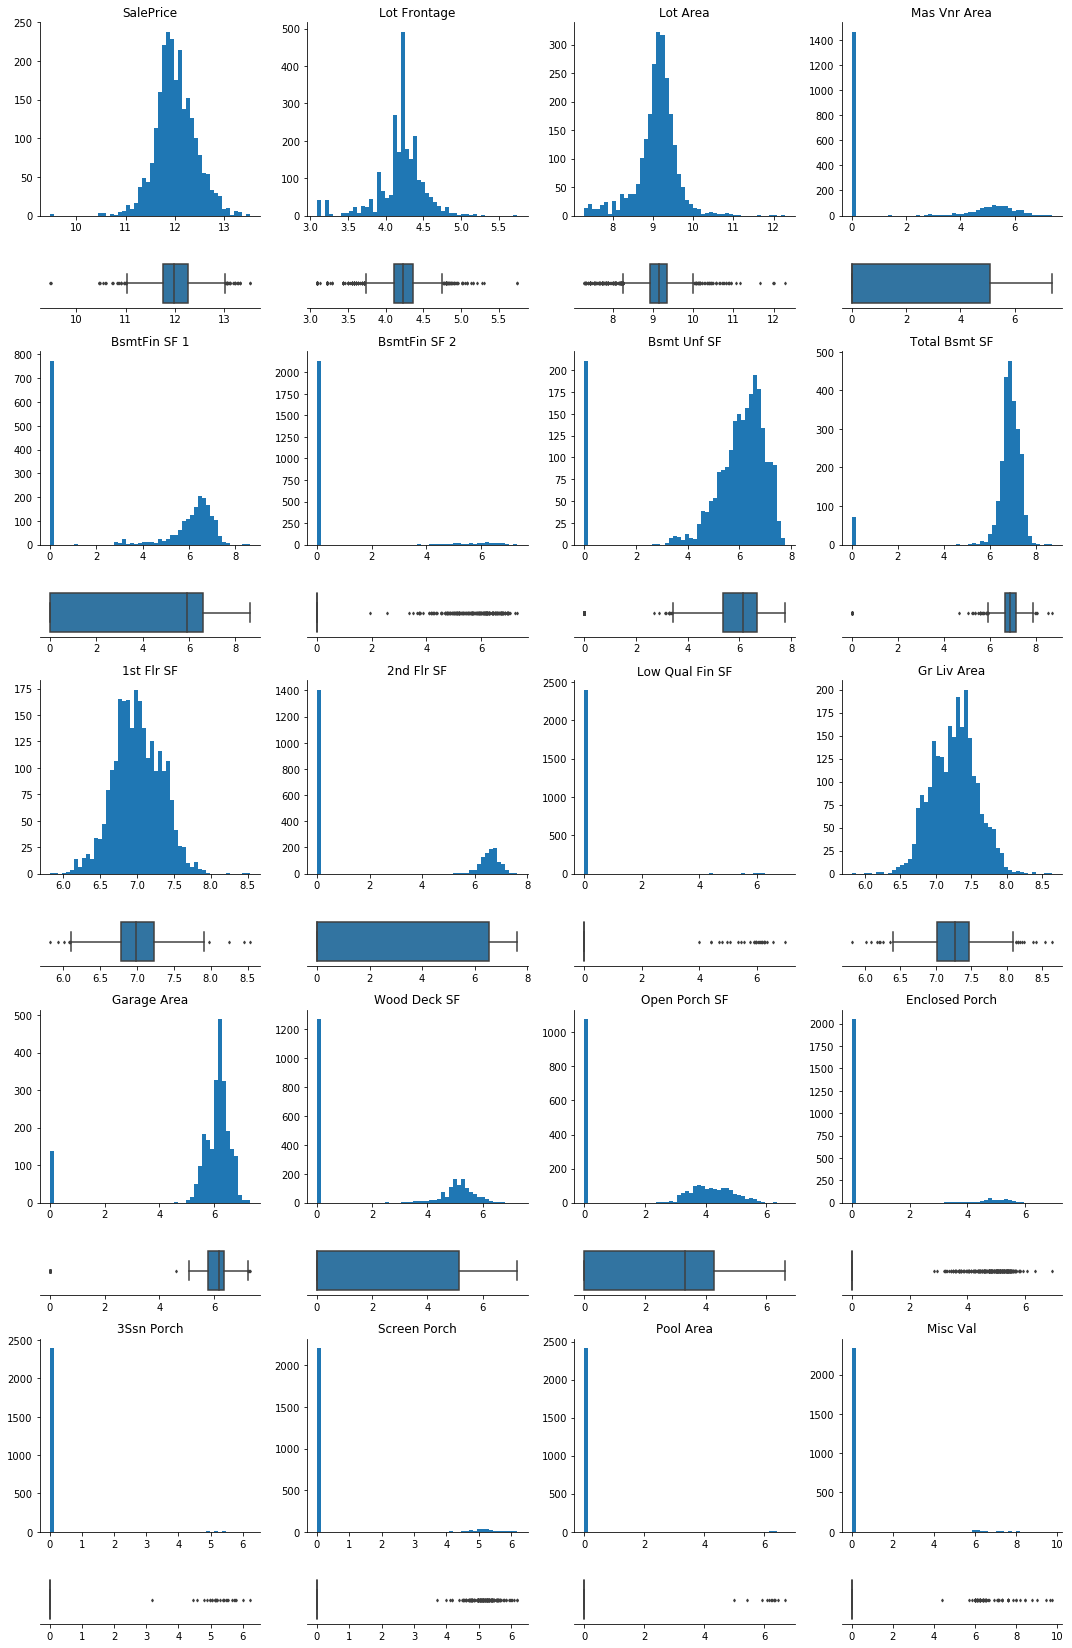

In [36]:
# 20 subplots of all continuous data
fig, axes = plt.subplots(
    10, 4 ,gridspec_kw={"height_ratios": (0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8 ,0.2)}, figsize=(15,23)
)
# pairing feature with column in plot
for row, i in zip([0,2,4,6,8],[0,1,2,3,4])  :

    for (feat, plot_col) in zip(continuous_col[0+4*i:4+4*i], [0,1,2,3]  ):

        axes[0+row, plot_col].hist(np.log1p(data_df[feat]), bins=50)
        axes[0+row, plot_col].set_title("{}".format(feat))
        sns.despine(ax=axes[0+row, plot_col])
        sns.boxplot(np.log1p(data_df[feat]), ax=axes[1+row, plot_col], fliersize=2)
        axes[1+row, plot_col].set(yticks=[])
        #axes[1+row, plot_col].set_title("{}".format(data_df[feat].median))
        sns.despine(ax=axes[1+row, plot_col], left=True)

    for ax in axes.flatten():
        ax.set_xlabel("")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">


### My feeling about what I would mathematically consider outliers with z-score, would impact the Sales Price greatly.
For example, houses with a pool or a 3-Season Porch are z-score outliers but at the same time, are probably more expensive and impacted by the presence of a pool.
    
I am not convinced a mathematical outlier removal makes sense, I would rather check "visually" those outliers. Indeed, many outliers could be specific case.
    
### First let's try z-score on each column excluding the 0


### Rather than calcuating outliers on the Price, I think more fit to use the Price per square feet for outliers in this manner.

In [37]:
data_df['Price SF'] = data_df['SalePrice'] / data_df['Gr Liv Area']
data_df['Price SF'].describe()

count    2430.000000
mean      121.526262
std        32.285616
min        15.371394
25%       100.142230
50%       120.376954
75%       139.885283
max       276.250881
Name: Price SF, dtype: float64

In [38]:
# Create a list of continuous columns on which we will look for outliers
column_for_outliers = continuous_col.copy()
column_for_outliers.remove('SalePrice')
column_for_outliers.remove('Gr Liv Area')
column_for_outliers.append('Price SF')
column_for_outliers

# here are the columns on which we will look for outliers

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Price SF']

In [39]:
# let's create a filter using the : distance to median (instead of mean to be less influenced by outliers) > 3 times standard deviation 
z_score_df = np.abs((data_df[column_for_outliers]) - (data_df[column_for_outliers].median())) > (4 * data_df[column_for_outliers].std())
print(z_score_df.sum())
print('total outliers :',z_score_df.sum().sum())

Lot Frontage       12
Lot Area           17
Mas Vnr Area       35
BsmtFin SF 1        4
BsmtFin SF 2       58
Bsmt Unf SF         1
Total Bsmt SF       5
1st Flr SF          7
2nd Flr SF          6
Low Qual Fin SF    23
Garage Area         5
Wood Deck SF       21
Open Porch SF      20
Enclosed Porch     25
3Ssn Porch         26
Screen Porch       39
Pool Area          11
Misc Val           11
Price SF            3
dtype: int64
total outliers : 329


<div class="alert alert-block alert-success">
    
    Outliers with usual Z-Score

### As we can see, we have way too many outliers (~900 hundred), we must be less restrictive, for example we can consider the value = 0 not to be an outlier and work only on the distributed part each value. 
For example, "Bsmt Unf SF" has a good distribution and a peak at 0. It does not mean 0 is an outlier, but on the distributed SF we can find them.

Let's modify our zscore formula to not include "zeros" in the calculation

In [40]:
# z_score including 0
zero_filter = data_df[column_for_outliers] != 0
zero_filter

# z_score
z_score = np.abs((data_df[zero_filter][column_for_outliers]) - (data_df[zero_filter][column_for_outliers].median())) / ((data_df[zero_filter][column_for_outliers].std()))

z_score_df_excl_0 = z_score > 3


In [41]:
z_score_df_excl_0.sum().sum()


263

<div class="alert alert-block alert-success">
    
    Adapted Z-Score

### As we can see with that "0" filter, we have way less outliers as the "common zeros" are not in it anymore.

In [42]:
# Create a function to drop rows on a boolean condition (here the test for zfilter): 

def drop_outliers(df, list_column, threshold):
    df=df.copy()
    
    #loop function for each column
    for column in list_column:
        df = df.drop(df.loc[np.abs(df[zero_filter][column] - df[zero_filter][column].median()) > threshold *(df[zero_filter][column].std())].index, axis = 0)    
    return df


In [43]:
# without outliers
data_df_wo = drop_outliers(data_df, column_for_outliers, 3)
print(data_df.shape,'rows, columns initially vs. ',data_df_wo.shape,' after outliers removal')

(2430, 83) rows, columns initially vs.  (2218, 83)  after outliers removal


### We dropped about 200 rows ~10 % of houses

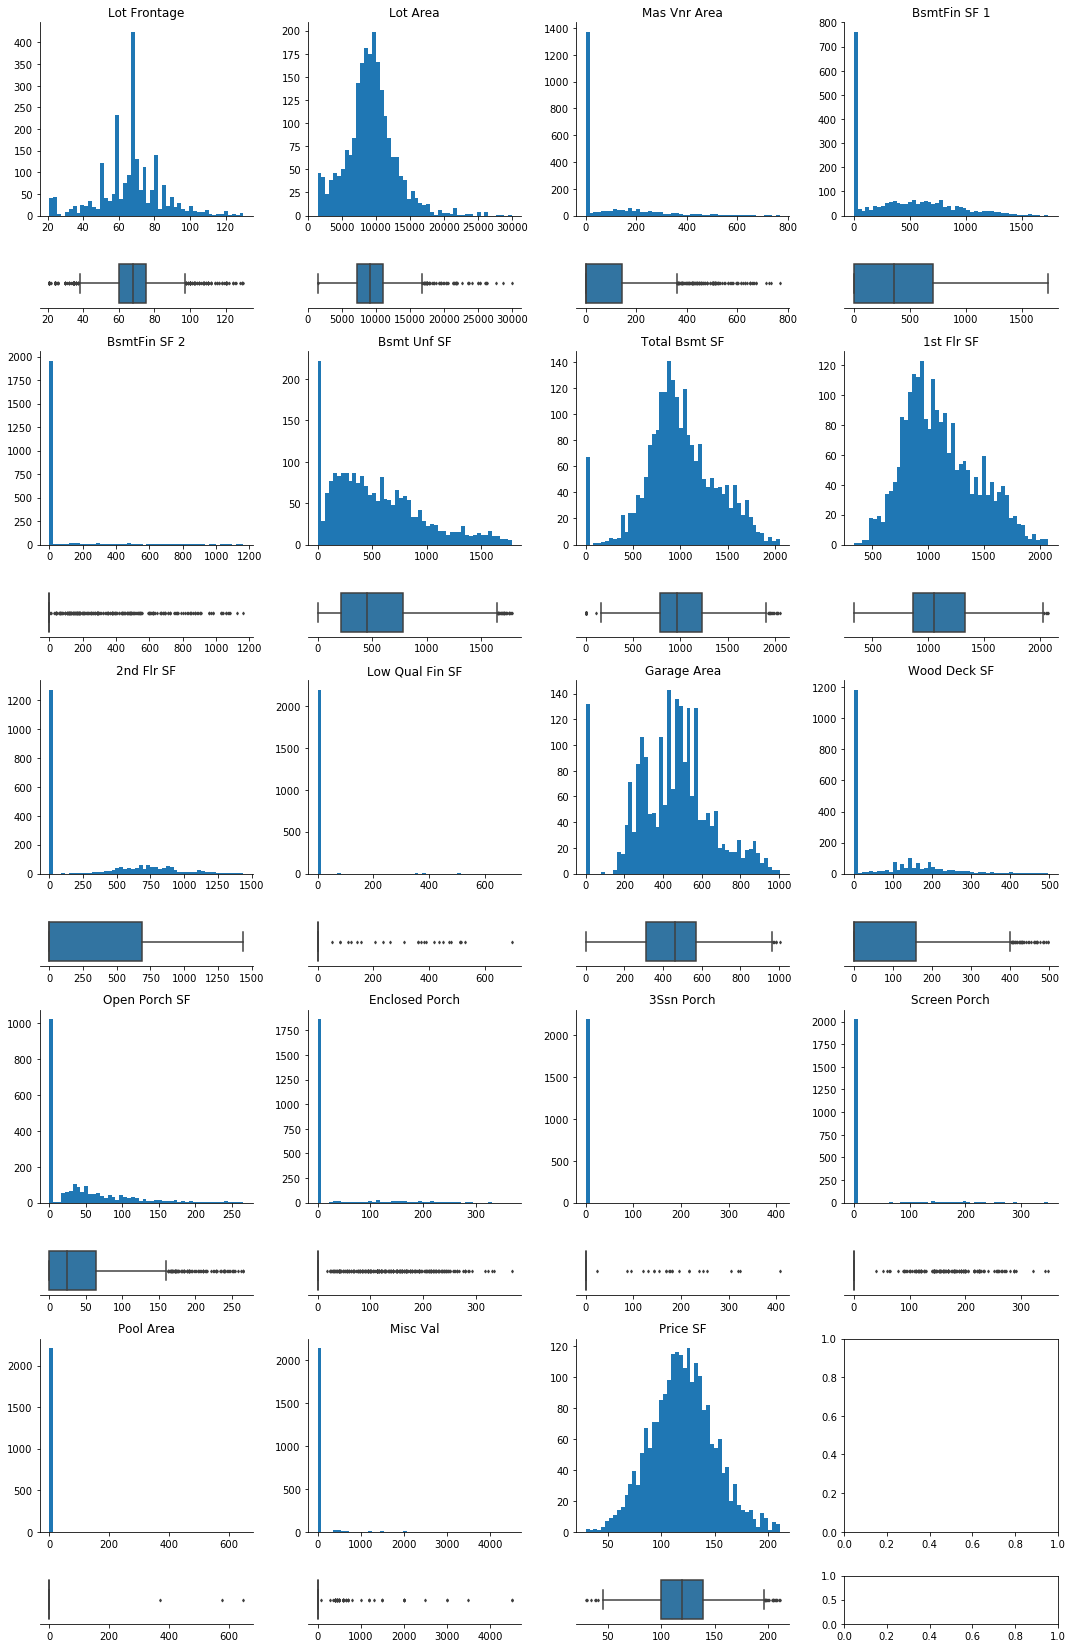

In [44]:
# 20 subplots of all continuous data
fig, axes = plt.subplots(
    10, 4 ,gridspec_kw={"height_ratios": (0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8 ,0.2)}, figsize=(15,23)
)
# pairing feature with column in plot
for row, i in zip([0,2,4,6,8],[0,1,2,3,4])  :

    for (feat, plot_col) in zip(column_for_outliers[0+4*i:4+4*i], [0,1,2,3]  ):

        axes[0+row, plot_col].hist(data_df_wo[feat], bins=50)
        axes[0+row, plot_col].set_title("{}".format(feat))
        sns.despine(ax=axes[0+row, plot_col])
        sns.boxplot(data_df_wo[feat], ax=axes[1+row, plot_col], fliersize=2)
        axes[1+row, plot_col].set(yticks=[])
        #axes[1+row, plot_col].set_title("{}".format(data_df[feat].median))
        sns.despine(ax=axes[1+row, plot_col], left=True)

    for ax in axes.flatten():
        ax.set_xlabel("")
plt.tight_layout()
plt.show()

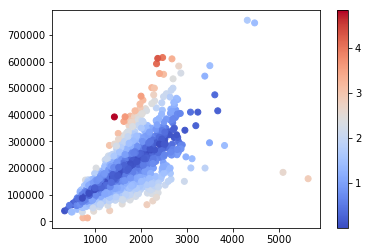

In [45]:
# Plot z-scores
plt.scatter(data_df['Gr Liv Area'], data_df['SalePrice'], c=z_score['Price SF'], cmap='coolwarm')
plt.colorbar()
plt.show()

### The 2 houses above 700 k$ are price outliers, but considering the Price per Square feet they are not ! They are just big houses

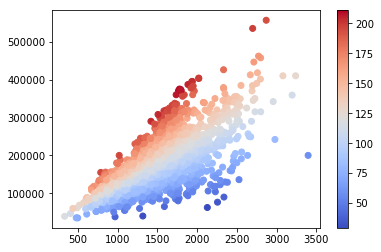

In [46]:
# Plot the sane without outliers
plt.scatter(data_df_wo['Gr Liv Area'], data_df_wo['SalePrice'] , c=data_df_wo['Price SF'], cmap='coolwarm')
plt.colorbar()
plt.show()

<div class="alert alert-block alert-success">
    
    Outliers removed

### Here I removed on both sides the "not usual sale prices" considering the square feet.

### And here, for example, the 2 houses sold above 700000$ were not we removed not because of the price, or Gr Liv Area, but for other reasons : Lot Frontage, 2nd Flr SF,...

In [47]:
z_score_df_excl_0.loc[data_df['SalePrice']>700000]

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Price SF
102,True,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
237,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False


### As "Price per SF" is dependent on 2 other columns : "SalePrice" and "Gr Liv Area", it does not bring information and bring collinearity, so we can drop it.
### We can notice, that other variables can be considered "collinear" as we have almost similar informations : we might need to drop these columns after.



In [48]:
data_df_wo= data_df_wo.drop('Price SF', axis = 1);
data_df_wo.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,68.0,8795,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NA,IR1,Bnk,...,0,NA,MnPrv,NA,0,1,2007,WD,Normal,122000


# Deeper analytical knowledge : Correlations 
--------------------------------------------------------------------

### Let's see if these features have a strong "correlation" with the Sale Price. 

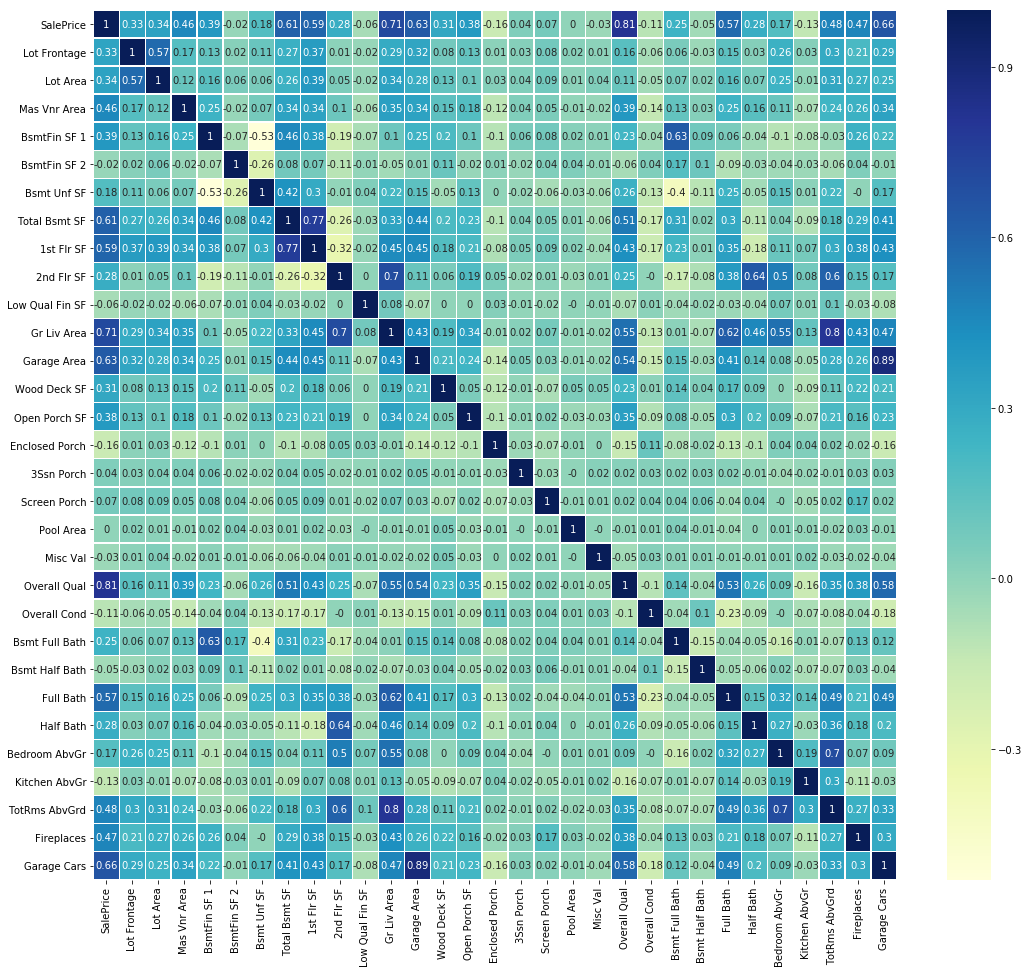

In [82]:
# check correlations between continuous data, ordinal(if numerical) and sales price

df_corr = data_df_wo[continuous_col + ordinal_col].corr(method='pearson').round(2)

plt.figure(figsize=(18, 16))
sns.heatmap(df_corr, 
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.3);
# blue is better, positive influence

In [83]:
df_corr['SalePrice'].sort_values(ascending = False).head(7)

SalePrice        1.00
Overall Qual     0.81
Gr Liv Area      0.71
Garage Cars      0.66
Garage Area      0.63
Total Bsmt SF    0.61
1st Flr SF       0.59
Name: SalePrice, dtype: float64

<div class="alert alert-block alert-info">


### Let's plot the most correlated columns with Sales Price to have a good understanding of the dataset (Garage Area and Garage cars are supposedly nearly collinear no need to plut them both)
    
    We will use later, the features for the simple model.

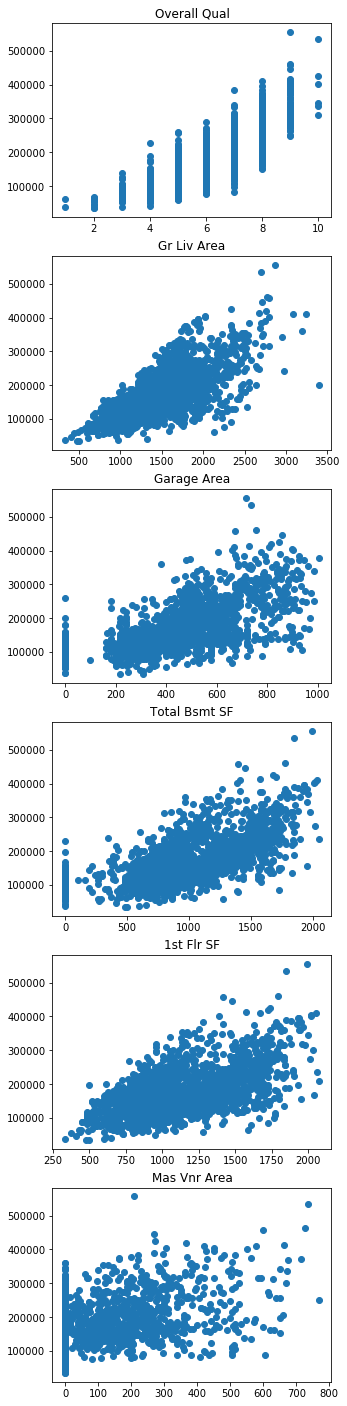

In [51]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(5, 25))

for col, ax in zip(['Overall Qual','Gr Liv Area','Garage Area', 'Total Bsmt SF', '1st Flr SF','Mas Vnr Area'],axes.ravel()):
    ax.scatter(data_df_wo[col], data_df_wo['SalePrice'])
    ax.set_title(col)

<div class="alert alert-block alert-success">

### Overall Quality seems to be very well connected to the Sales Price, which makes sense as it must depend on other variables. Colinearity Possible ?

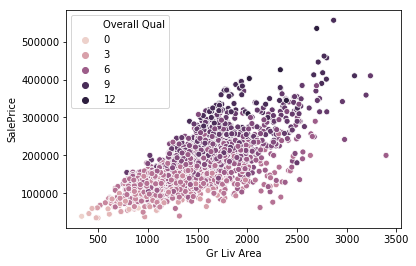

In [52]:
sns.scatterplot(data_df_wo['Gr Liv Area'], data_df_wo['SalePrice'], hue = data_df_wo['Overall Qual'])
plt.show()

### These are the features I will use in my simple model

# Feature Engineering : Ordinal Encoding

### Let's encode ordinal columns based on the documentation.txt and what I would consider more important or valuable in a property


In [53]:
# Print each value for all ordinal columns
for col in ordinal_col:
    print(col,' :',data_df_wo[col].unique())


Lot Shape  : ['IR1' 'Reg' 'IR2' 'IR3']
Utilities  : ['AllPub' 'NoSeWa' 'NoSewr']
Land Slope  : ['Gtl' 'Mod' 'Sev']
Overall Qual  : [ 7  6  4  5  8  9  3  1  2 10]
Overall Cond  : [5 6 4 8 7 9 3 2 1]
Exter Qual  : ['Gd' 'TA' 'Fa' 'Ex']
Exter Cond  : ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual  : ['Gd' 'TA' 'Ex' 'NA' 'Fa' 'Po']
Bsmt Cond  : ['TA' 'Gd' 'Fa' 'NA' 'Ex' 'Po']
Bsmt Exposure  : ['No' 'Av' 'Mn' 'Gd' 'NA']
BsmtFin Type 1  : ['GLQ' 'Unf' 'Rec' 'LwQ' 'BLQ' 'ALQ' 'NA']
BsmtFin Type 2  : ['Unf' 'LwQ' 'BLQ' 'NA' 'Rec' 'ALQ' 'GLQ']
Heating QC  : ['Ex' 'TA' 'Fa' 'Gd' 'Po']
Electrical  : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Kitchen Qual  : ['Gd' 'TA' 'Ex' 'Fa' 'Po']
Functional  : ['Typ' 'Mod' 'Min2' 'Min1' 'Maj1' 'Maj2' 'Sev']
Fireplace Qu  : ['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex']
Garage Finish  : ['Fin' 'Unf' 'RFn' 'NA']
Garage Qual  : ['TA' 'Fa' 'NA' 'Ex' 'Gd' 'Po']
Garage Cond  : ['TA' 'NA' 'Fa' 'Gd' 'Ex' 'Po']
Paved Drive  : ['Y' 'N' 'P']
Pool QC  : ['NA' 'Fa' 'Gd' 'TA']
Fence  : ['NA' 'MnPrv'

In [54]:
# create a mapping based on "personal" values : example, better to have "all utilities" = 8,  much more valuable than no Sewer and no water = 3

map_ordinal =  [{"col":"Lot Shape", "mapping": {'Reg':5, 'IR1':3, 'IR2':2, 'IR3':1  }},
                {"col":"Utilities", "mapping": {'AllPub':8, 'NoSewr':6, 'NoSeWa':3, 'ELO':1  }},
                {"col":"Land Slope","mapping": {'Gtl':5, 'Mod':3, 'Sev':1  }},
                {"col":"Exter Qual","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1  }},
                {"col":"Exter Cond","mapping": {'Ex':5,'Gd':4, 'TA':3, 'Fa':2, 'Po':1  }},
                {"col":"Bsmt Qual", "mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0  }},
                {"col":"Bsmt Cond", "mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0  }},
                {"col":"Bsmt Exposure","mapping": {'Gd':5, 'Av':4, 'Mn':3, 'No':1, 'NA':0  }},
                {"col":"BsmtFin Type 1","mapping": {'GLQ':8, 'ALQ':6, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0  }},
                {"col":"BsmtFin Type 2","mapping": {'GLQ':8, 'ALQ':6, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0  }},
                {"col":"Heating QC","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1  }},
                {"col":"Electrical","mapping": {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1  }},
                {"col":"Kitchen Qual","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1  }},
                {"col":"Functional","mapping": {'Typ':10, 'Min1':9, 'Min2':8, 'Mod':7, 'Maj1':5, 'Maj2':4, 'Sev':2, 'Sal':1 }},
                {"col":"Fireplace Qu","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0  }},
                {"col":"Garage Finish", "mapping": {'Fin':5, 'RFn':3, 'Unf':1, 'NA':0  }},
                {"col":"Garage Qual","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0  }},
                {"col":"Garage Cond","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0  }},
                {"col":"Paved Drive","mapping": {'Y':5, 'P':3, 'N':1  }},
                {"col":"Pool QC","mapping": {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'NA':0 }},
                {"col":"Fence","mapping": {'GdPrv':5, 'MnPrv':4, 'GdWo':3, 'MnWw':2, 'NA':0  }}]



### I installed another category_encoders which can use "mapping" : conda install -c conda-forge category_encoders

Scikit learn OrdinalEncoder seems less practical for the mapping and returns a dataframe, found this one here : https://github.com/scikit-learn-contrib/category_encoders/issues/228

In [55]:
from category_encoders.ordinal import OrdinalEncoder

# Handle ordinal variables
ordinal_encoder = OrdinalEncoder(mapping = map_ordinal, 
                         return_df = True)  

# returns df

### One hot encoding

In [56]:
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer

# Handle nominal variables
nominal_transformer = ohe(handle_unknown='ignore', sparse = False)


# returns array

In [57]:
from category_encoders.one_hot import OneHotEncoder as ohe2
nominal_transformer2 = ohe2(handle_unknown='ignore', return_df = True , use_cat_names = True, drop_invariant = True)
# returns df

In [58]:
def fill_na(df):
    # Work on a copy
    df = df.copy()

   
    # Missing values in continuous features
    col_nan_to_na = [x for x in col_with_nan if x not in ['Electrical','Lot Frontage','Mas Vnr Area','Garage Area','Garage Cars', 'Garage Yr Blt','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']]

    for col in col_nan_to_na:
        if col == 'Mas Vnr Type':
            df[col] = df[col].fillna('None')
        else:
            df[col] = df[col].fillna('NA') # replace by existing "NA" in documentation
    
    
    # Replace NaN by 0

    for col in ['Mas Vnr Area','Garage Area','Garage Cars', 'Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']:
        df[col] = df[col].fillna(0) # replace by 0 as it represents a "number"

    # Replace NaN by other value 

    # by most frequent value
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().idxmax())

    # by median value
    df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())

    # by "No garage"
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


    
    return df



# Split data

In [59]:
# Split into train/test sets

train_df, test_df = train_test_split(
    data_df_wo, train_size=0.5, test_size=0.5, random_state=8)

In [60]:
# Create X/y variables

X = data_df_wo.drop('SalePrice', axis=1)
y = np.log1p(data_df_wo['SalePrice'])


X_tr = train_df.drop('SalePrice', axis=1)
y_tr = np.log1p(train_df['SalePrice'])

X_te = test_df.drop('SalePrice', axis=1)
y_te = np.log1p(test_df['SalePrice'])



# Create a pipeline that can be used for all three "models" : simple, intermediate and complex

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [92]:
# I created Pipeline imbricated in column transformer into another pipeline like found here : https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f

# Modify list of columns if necessary (depends on the complexity of the model) 

continuous_col_ex_y = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
ordinal_col = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars']
yr_col = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold','Mo Sold']
nominal_col = ['MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']

# alpha chosen by default
alpha = 1



# FunctionTransformer = fill na with columns specified in the function fill_na
fill_na_pipe = FunctionTransformer(fill_na, validate=False)


# Define pipeline for Years
year_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value = 0)),
                     ('years', FunctionTransformer(lambda X: X))])



# Define categorical pipeline for one hot encoding
nominal_pipe = Pipeline([('ohe', ohe(handle_unknown='ignore', sparse = False))])

# Define categorical pipeline for ordinal encoding as defined with the former mapping = map_ordinal
ordinal_pipe = Pipeline([('ordinal', OrdinalEncoder(mapping = map_ordinal, return_df = True) )])

# Define numerical pipeline (simple imputer + log1p + polynomial + Standard Scaler) 
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('log_poly', FunctionTransformer(lambda X: np.c_[np.log1p(X), X**2, X**0.5, X**3])),
                     ('scaler', StandardScaler())])

# Combine categorical and numerical pipelines => 78 input columns to 294 (contiuous 19 to 76 columns, nominal 23 to 181, ordinal 32 to 32, 4 years columns)
preprocessor = ColumnTransformer(transformers=[('nom', nominal_pipe, nominal_col),
                                               ('ord', ordinal_pipe, ordinal_col),
                                               ('year', year_pipe, yr_col),
                                               ('num', num_pipe, continuous_col_ex_y)])


# Fit a pipeline with transformers and an estimator to the training data
pipe = Pipeline(steps=[('fill na', fill_na_pipe),
                       ('preprocessor', preprocessor),
                       ('model', Ridge(alpha = alpha, tol = 1e-6))])

# I choose ridge estimator because lasso seems to under-evaluate the impact of some features.

pipe.fit(X_tr, y_tr)



# Predict training data, invert log1p with exp1m
y_tr_prev = np.expm1(pipe.predict(X_tr))
print(f"Predictions on train data MAE : " ,MAE(np.expm1(y_tr), y_tr_prev).round(2))

# Predict test data
y_te_prev = np.expm1(pipe.predict(X_te))
print(f"Predictions on test data MAE : ",MAE(np.expm1(y_te), y_te_prev).round(2))

Predictions on train data MAE :  9406.65
Predictions on test data MAE :  12403.03


In [64]:
len(yr_col)

5

In [65]:
# Fit/test 20 models (alpha) with 10 different splits
gs_results = []
for run_idx in range(10):
    # Split into train/test sets from the dataframe without outliers
    train_df, test_df = train_test_split(
    data_df_wo, train_size=0.7, test_size=0.3, random_state=run_idx)
    
    # Create X/y variables

    X_te = test_df.drop('SalePrice', axis=1)
    y_te = np.log1p(test_df['SalePrice'])


    X_tr = train_df.drop('SalePrice', axis=1)
    y_tr = np.log1p(train_df['SalePrice'])


    # Grid search 
    for alpha in np.logspace(-2, 4, num=20):
        # modify the pipeline alpha in the Ridge estimator
        pipe.set_params(model__alpha=alpha)
        pipe.fit(X_tr, y_tr)
        
        y_tr_prev = np.expm1(pipe.predict(X_tr))
        y_te_prev = np.expm1(pipe.predict(X_te))

        # Save model and its performance on train/test sets
        gs_results.append({
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mae': MAE(np.expm1(y_tr), y_tr_prev),
            'test_mae': MAE(np.expm1(y_te), y_te_prev),
        })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.sort_values(ascending = True, by = ['test_mae']).head()


,alpha,run_idx,test_mae,train_mae
171,29.763514,8,10425.007132,10679.373084
172,61.584821,8,10455.645128,11013.437719
170,14.384499,8,10482.657190,10437.892220
169,6.951928,8,10558.902395,10253.301356
173,127.427499,8,10592.969293,11441.867730


<div class="alert alert-block alert-info">

### Here we see that the best alpha but for one run / split, let's check on the 10 test/train splits (cross validation)
    
    Looks like the split 8, has a really homogenous distribution between the test and train set.

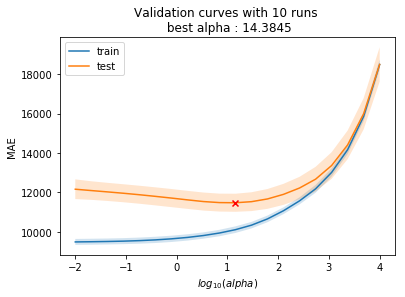

In [74]:
# Group the results by alpha

gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mae.mean()
mean_te = gb_alpha.test_mae.mean()
std_tr = gb_alpha.train_mae.std()
std_te = gb_alpha.test_mae.std()
alphas = mean_tr.index.values

# Get entry with the best mean test MAE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)


# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train')
plt.plot(np.log10(alphas), mean_te, label='test')

# Quantify variance with ± 2 x std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs \n best alpha : {}'.format(len(gs_results.groupby('run_idx')),best_alpha.round(4)))
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">

### Indeed we see a different result considering the 10 splits

<div class="alert alert-block alert-success">

### For alpha < 0.1, we see that the model is overfitting on the training set, alpha > 100 it diverges.

# Let's fit the model with alpha = best alpha

In [75]:
# Define the best_alpha for the Ridge estimator in the Pipeline ==> Fit on the whole dataset
pipe.set_params(model__alpha=best_alpha);
pipe.fit(X, y);

In [76]:
# Checking globally on the whole dataset
y_prev = np.expm1(pipe.predict(X))
print(f"Predictions on the whole dataset: ",MAE(np.expm1(y), y_prev).round(2))

Predictions on the whole dataset:  10242.96


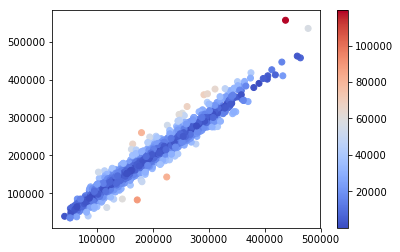

In [69]:
# Plot the predictions compared to the real prices
plt.scatter(y_prev, np.expm1(y),  c= abs(np.expm1(y) - y_prev), cmap='coolwarm')
plt.colorbar()
plt.show()

In [70]:
X_encoded = preprocessor.transform(X)
X_encoded.shape

(2218, 294)

In [71]:
data_df_validation = pd.read_csv('house-prices-test.csv')
data_df_validation.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


In [72]:
y_val = np.expm1(pipe.predict(data_df_validation))
y_val.round(2)


array([195962.64, 148421.81, 288810.81, 134561.77,  91786.8 , 172528.95,
        52729.47, 130864.07, 145457.98, 107369.36, 199819.78, 128549.09,
       310471.89, 144289.52, 211688.19, 146997.34, 163757.81, 119011.64,
       198070.67, 129035.43, 201780.14, 324463.26, 233035.25, 121577.35,
       201186.23, 123401.21, 224206.55, 302844.58, 291255.81, 400294.76,
       195038.01, 256382.45, 119870.15, 114277.71, 175463.52, 176254.11,
       180030.27, 159614.82, 189009.54, 156459.44, 289020.41, 140976.98,
       349988.66, 197252.26, 286245.75, 424333.64, 139085.47, 237423.79,
       132447.2 , 212887.98, 125230.95,  97715.19, 144806.37, 258825.13,
       150281.28, 110428.48, 317046.71, 105200.46,  85217.72, 251267.24,
       199721.79, 148587.39,  69394.45, 125611.57, 135202.49, 127350.64,
       126212.7 , 156263.72, 204207.67, 174721.99, 162932.89, 140209.22,
       195605.43, 146962.52, 202573.09, 306789.09, 173551.8 , 230387.62,
       143676.02, 238667.67, 139800.57,  92086.85, 